In [1]:
!pip install -q tflite-model-maker

     |████████████████████████████████| 577 kB 5.3 MB/s 
     |████████████████████████████████| 88 kB 6.5 MB/s 
     |████████████████████████████████| 238 kB 48.4 MB/s 
     |████████████████████████████████| 60.8 MB 102 kB/s 
     |████████████████████████████████| 77 kB 3.9 MB/s 
     |████████████████████████████████| 1.3 MB 50.7 MB/s 
     |████████████████████████████████| 1.1 MB 47.2 MB/s 
     |████████████████████████████████| 10.9 MB 44.6 MB/s 
     |████████████████████████████████| 128 kB 56.0 MB/s 
     |████████████████████████████████| 3.4 MB 38.9 MB/s 
     |████████████████████████████████| 840 kB 52.1 MB/s 
     |████████████████████████████████| 25.3 MB 9.3 MB/s 
     |████████████████████████████████| 498.0 MB 12 kB/s 
     |████████████████████████████████| 352 kB 74.6 MB/s 
     |████████████████████████████████| 5.8 MB 50.4 MB/s 
     |████████████████████████████████| 462 kB 35.7 MB/s 
     |████████████████████████████████| 1.4 MB 52.9 MB/s 
     |████████████

In [2]:
from tflite_model_maker import image_classifier
from tflite_model_maker.image_classifier import DataLoader
from tflite_model_maker.image_classifier import MobileNetV2Spec

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!ls gdrive/MyDrive

 bitki-veriseti.zip				 'Proje Başvuru Formu.gdoc'
'Colab Notebooks'				 'Tez Kitapçığı.gdoc'
'OtoPay Tez Kitapçığı.gdoc'			 'Web Ödev1'
'profesyonel pazarlama başkanlığı dairesi.gdoc'


In [5]:
!unzip gdrive/MyDrive/bitki-veriseti.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/cuha/image18.jpeg  
  inflating: data/cuha/image-188-640x480.jpg  
  inflating: data/cuha/image20.jpeg  
  inflating: data/cuha/image21.jpeg  
  inflating: data/cuha/image22.jpeg  
  inflating: data/cuha/image23.jpeg  
  inflating: data/cuha/image24.jpeg  
  inflating: data/cuha/image25.jpeg  
  inflating: data/cuha/image26.jpeg  
  inflating: data/cuha/image27.jpeg  
  inflating: data/cuha/image28.jpeg  
  inflating: data/cuha/image29.jpeg  
  inflating: data/cuha/images100.jpg  
  inflating: data/cuha/images107.jpg  
  inflating: data/cuha/images108.jpg  
  inflating: data/cuha/images109.jpg  
  inflating: data/cuha/images110.jpg  
  inflating: data/cuha/images112.jpg  
  inflating: data/cuha/images113.jpg  
  inflating: data/cuha/images115.jpg  
  inflating: data/cuha/images116.jpg  
  inflating: data/cuha/images117.jpg  
  inflating: data/cuha/images118.jpg  
  inflating: data/cuha/images120.jpg  
  inflating: dat

In [6]:
data = DataLoader.from_folder('/content/data')

In [7]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

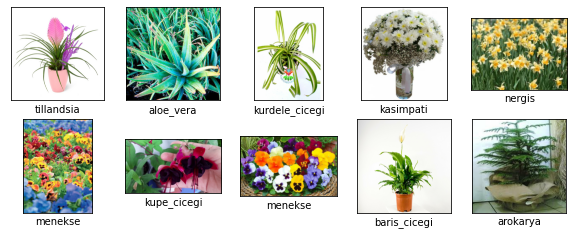

In [8]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(10)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [9]:
model = image_classifier.create(train_data, model_spec='mobilenet_v2', validation_data=validation_data)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             2257984   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 50)                64050     
                                                                 
Total params: 2,322,034
Trainable params: 64,050
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/5
158/158 [==============================] - 349s 2s/step - loss: 2.9448 - accuracy: 0.3147 - val_loss: 2.1937 - val_accuracy: 0.5512
Epoch 2/5
158/158 [==============================] - 343s 2s/step - loss: 1.9347 - accuracy:

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             2257984   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 50)                64050     
                                                                 
Total params: 2,322,034
Trainable params: 64,050
Non-trainable params: 2,257,984
_________________________________________________________________


In [11]:
loss, accuracy = model.evaluate(test_data)

20/20 [==============================] - 72s 2s/step - loss: 1.7109 - accuracy: 0.7091


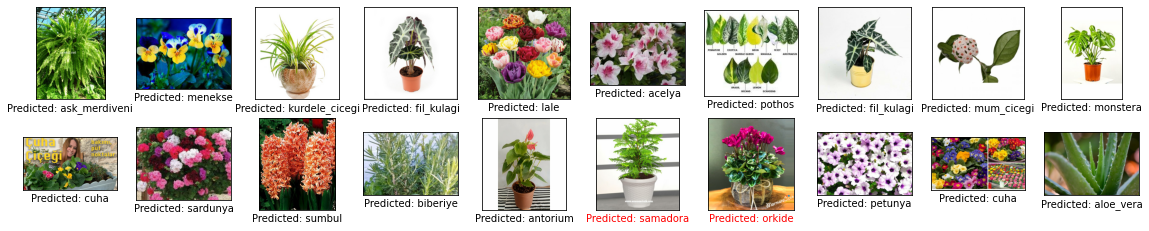

In [12]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(20)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [13]:
model.export(export_dir='.')

/usr/local/lib/python3.8/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
